# What behaviors are associated with learning in Interactive Radio Instruction?   

This is analysis seeks to perform a correlation analysis to identify what learner behavior may be associated with measures of learning e.g earning a certificate of completion.

In [275]:
#Importing Libraries
import pandas as pd

pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.
pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.

#read file from data folder, return file
def read_data(file_name, folder="/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"):
    #combine foler and file name to get the full path
    df = pd.read_pickle(folder + file_name)
    return df

response_df = read_data(file_name="response.pkl")
response_df.sample(3, random_state=5) #See sample of data

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
350758,2021-07-21 10:10:49,2021-07-21 10:10:49,38080,689443,profile/access#internet,No,0
1326640,2022-10-12 05:30:04,2022-10-12 05:30:04,60765,2634967,airscience-2022a/course/tests/step-1-test#q1-what-are-the-first-2-steps-of-the-engineering-process,"Identify, investigate",1
1139735,2022-07-12 22:51:44,2022-07-12 22:51:44,53007,2290362,course-menu,My Profile,0


In [276]:
# Getting learners registered with Lira section
registration_df = read_data(file_name="registration.pkl")
registration_df.sample(3, random_state=5) #See sample of data

,created,updated,course_id,user_id
id,,,,
68167,2022-09-20 12:00:24,2022-09-20 12:00:24,5,62814
41133,2021-07-08 06:00:26,2021-07-08 06:00:26,3,32204
40410,2021-07-07 02:39:43,2021-07-07 02:39:43,3,30940


# Sampling Method 

Which course learners should we use for this analysis?
Course 3 Lira learners that completed the baseline survey will be used for this analysis. 

In [277]:
print("Number of Users Registed for Course Sections")
print(registration_df["course_id"].value_counts())

Number of Users Registed for Course Sections
3    17950
2    10834
5     2754
4     1417
Name: course_id, dtype: int64


Restrict to Lira Course 3

In [278]:
#Get user ids
is_lira_id_5 = registration_df["course_id"] == 5
lira_learners_ids = registration_df.loc[is_lira_id_5, "user_id"]
print("Total Lira Learners", len(lira_learners_ids))

Total Lira Learners 2754


In [279]:
#Restrict to user_ids
lira_responses = response_df[response_df["user_id"].isin(lira_learners_ids)]

#Restrict to dates
#TODO: Exam questions are listed outside of this time. What was the exam in course 3?
is_course_3_date = (lira_responses["created"] >= "2022-08-11") & (lira_responses["created"] <= "2022-12-29") 
lira_responses = lira_responses.loc[is_course_3_date]

lira_responses.sample(3)

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1506308,2022-12-08 07:11:37,2022-12-08 07:11:37,32108,2947393,tech-team-static/static-pages/fees-status,Back to Menu,0
1218751,2022-09-20 11:56:59,2022-09-20 11:56:59,63065,2425994,profile/surname,77a741f7c013d0df2896b5c18ac1bd296c5872927bec659b3077674766fc33df,0
1287248,2022-09-30 13:42:58,2022-09-30 13:42:58,62978,2558433,airscience-2022a/course/intro-step/intro-step-lesson-3/go-to-questions#what-are-technologies,They all simplify life or solve a problem,1


In [280]:
#Get People who have compleed the last question on the baseline
is_last_baseline_question = lira_responses["key"] == "airscience-2022a/course/baseline-survey#question-10-when-facing-a-new-problem-lesson-objectives-baseline-survey-objectives-md-10-creativity-and-ego-resilience"
users_completed_baseline_ids = lira_responses[is_last_baseline_question]["user_id"].unique()
print("users that completed baseline", len(users_completed_baseline_ids))

users that completed baseline 1552


In [281]:
#Restrict to user_ids that completed baseline
lira_responses = lira_responses[lira_responses["user_id"].isin(users_completed_baseline_ids)]
lira_responses.sample(3)

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1453346,2022-11-12 08:41:32,2022-11-12 08:41:32,69098,2857245,course-menu,My Course,0
1468732,2022-11-16 16:46:53,2022-11-16 16:46:53,26294,2882400,airscience-2022a/course/step-6-test/step-6-lesson-2/go-to-questions#did-you-listen-to-the-radio-lesson-before-doing-these-questions,No,0
1399808,2022-10-30 14:12:05,2022-10-30 14:12:05,43442,2767070,tech-team-static/static-pages/my-course,Previous Lessons,0


# Selecting Data Features
The following features are of interest for this analysis:
- lesson_questions = the number of unique lesson questions a user has responded to over the course (quantitative)
- Correct Test Questions (count) = the number of test questions a user answered correctly over the course
- Correct Exam Questions (Count) - the number of questions a user answered correctly on the final exam assessment
- Number of Responses Sent During Broadcast. - number of responses learners sent during the scheduled radio broadcast time (11:15 - 11:45 UTC, 24 HR time format)

## Feature Engineering

In [282]:
def get_step(keys):
    step_pattern = r"((?<=step-)\d{1,2}|baseline|intro-step|endline|course-menu|exam-questions)"
    step_column = keys.str.extract(step_pattern)
    return step_column

def get_lesson_number(keys):
    lesson_pattern = r"(?<=lesson-)([\d{1,2}])"
    lesson_column = keys.str.extract(lesson_pattern)
    return lesson_column

def get_question_number(keys):
    question_pattern = r"(?<=q)([\d{1,2}])"
    question_column = keys.str.extract(question_pattern)
    return question_column

def expand_question_keys(df):
    #Label step, lesson, and question
    df["step_num"] = get_step(df["key"])
    df["lesson_num"] = get_lesson_number(df["key"])
    df["question_num"] = get_question_number(df["key"])

    return df
    pass



In [283]:
# Expanding Keys to label steps, lessons, and question numbers
lira_responses_to_assessments = expand_question_keys(lira_responses)
#drop non step questions
#lira_responses_to_assessments = lira_responses_to_assessments.dropna
lira_responses_to_assessments.sample(5, random_state=3)

,created,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num
id,,,,,,,,,,
1517630,2022-12-13 14:17:16,2022-12-13 14:17:16,60547,2965981,airscience-2022a/course/endline-survey#question-6-bodas-are-going-too-fast-lesson-objectives-endline-survey-objectives-md-6-problem-solving-process,I make a plan and advise the local leadership,0,endline,NaN,NaN
1325305,2022-10-11 11:53:36,2022-10-11 11:53:36,68148,2632727,airscience-2022a/course/step-2-investigate/step-2-lesson-1/go-to-questions#q2-why-was-it-easy-to-slide-off-the-ground-without-shoes-on,Friction is low on smooth surfaces,0,2,1,2
1312239,2022-10-05 19:10:39,2022-10-05 19:10:39,30696,2607123,airscience-2022a/course/step-1-identify/step-1-lesson-3/go-to-questions#what-is-time-poverty,Lose of time due to unproductive work,0,1,3,NaN
1387916,2022-10-27 09:33:04,2022-10-27 09:33:04,60421,2745973,tech-team-static/static-pages/my-course,My Weekly Tests,0,NaN,NaN,NaN
1303589,2022-10-03 13:57:59,2022-10-03 13:57:59,65060,2589481,airscience-2022a/course/step-1-identify/step-1-lesson-1/go-to-questions#how-is-work-divided-among-boys-and-girls-at-home,Girls do most of the work,1,1,1,NaN


In [284]:
is_lesson_response = lira_responses_to_assessments["key"].str.contains("lesson") & lira_responses_to_assessments["key"].str.contains("step")
lesson_keys = lira_responses_to_assessments[is_lesson_response]["key"].unique()
print("num of lesson questions:", len(lesson_keys))

num of lesson questions: 106


In [285]:
is_test_response = lira_responses_to_assessments["key"].str.contains("test") & lira_responses_to_assessments["key"].str.contains("step")
test_keys = lira_responses_to_assessments[is_test_response]["key"].unique()
print("num of test questions ", len(test_keys))
print("correct test questions needed to get certificate: ", 0.6 * 115)

num of test questions  115
correct test questions needed to get certificate:  69.0


In [286]:
def calc_user_lessons_done(single_user_responses_df):
    #drop non lesson question responses
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    user_lesson_responses = single_user_responses_df.loc[is_lesson_response]
    #user_lesson_responses_duplicates_removed = user_lesson_responses.drop_duplicates()

    return user_lesson_responses["key"].nunique()


def calc_user_correct_test_questions(single_user_responses_df):
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    user_test_responses = single_user_responses_df.loc[is_test_response]
    

    return user_test_responses["correct"].sum()
    pass

def cal_exam_score():
    pass

def cal_user_resposes_during_broadcast(single_user_responses_df):
    """_summary_

    Args:
        single_user_responses_df (_type_): _description_

    Returns:
        _int_: _count of messages during broadcast time_
    """
    #include only lesson or test quesitons
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    single_user_responses_df = single_user_responses_df.loc[is_lesson_response | is_test_response]

    #Remove Sunday responses (no broadcast on Sunday)
    is_Sunday = single_user_responses_df["created"].dt.day_name() == "Sunday"
    non_Sunday_responses = single_user_responses_df.loc[~is_Sunday].set_index("created")
    #get responses during broadcast
    responses_during_broadcast = non_Sunday_responses.between_time(start_time="11:15", end_time="11:45")

    return len(responses_during_broadcast)


In [287]:
#group respones from lira to users
lira_responses_to_assessments_user_grouped = lira_responses_to_assessments.groupby("user_id")

## Combine Features

In [288]:
#create dataframe with features
lira_learner_outcomes = pd.DataFrame()
lira_learner_outcomes

""


In [289]:
lira_learner_outcomes["lesson_questions"] = lira_responses_to_assessments_user_grouped.apply(calc_user_lessons_done)

In [290]:
lira_learner_outcomes["correct_test_questions"] = lira_responses_to_assessments_user_grouped.apply(calc_user_correct_test_questions)

In [291]:
lira_learner_outcomes["responses_during_broadcast"] = lira_responses_to_assessments_user_grouped.apply(cal_user_resposes_during_broadcast)

In [292]:
lira_learner_outcomes.sample(4)

,lesson_questions,correct_test_questions,responses_during_broadcast
user_id,,,
63428,9,3,0
33823,67,39,15
63937,67,48,30
18433,8,0,0


In [293]:
lira_learner_outcomes.describe()

,lesson_questions,correct_test_questions,responses_during_broadcast
count,1552.000000,1552.000000,1552.000000
mean,23.356314,16.452964,7.862113
std,30.913931,31.775147,19.283298
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000
75%,34.000000,17.000000,7.000000
max,102.000000,304.000000,236.000000


There is a strange outlier with the number of responses sent during broadcast. 

# Descriptive Visualizations 

## Time Distribution of Messages

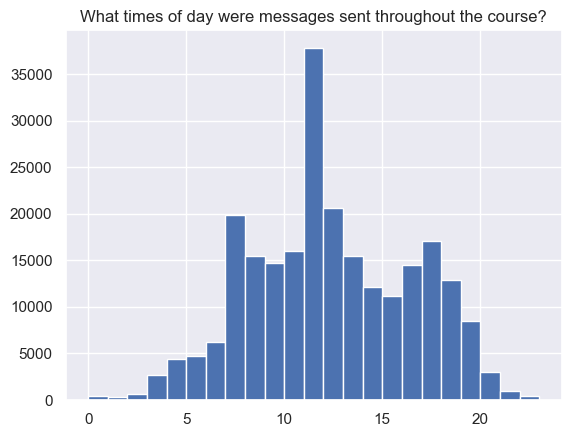

In [294]:
import matplotlib.pyplot as plt
#distribution of times
#response_features["created"].dt.time
lira_responses_to_assessments["created"].dt.hour.hist(bins=23)
plt.title("What times of day were messages sent throughout the course?")
#plt.title("What hours of the day were responses sent?")
plt.show()

In [295]:

print("Messages Sent during Hours of Day (24HR)")
print(lira_responses_to_assessments["created"].dt.hour.value_counts())

Messages Sent during Hours of Day (24HR)
11    37833
12    20607
7     19821
17    17118
10    16047
8     15458
13    15447
9     14753
16    14502
18    12892
14    12078
15    11184
19     8432
6      6181
5      4682
4      4354
20     3028
3      2700
21      946
2       619
0       358
1       302
22      254
23      174
Name: created, dtype: int64


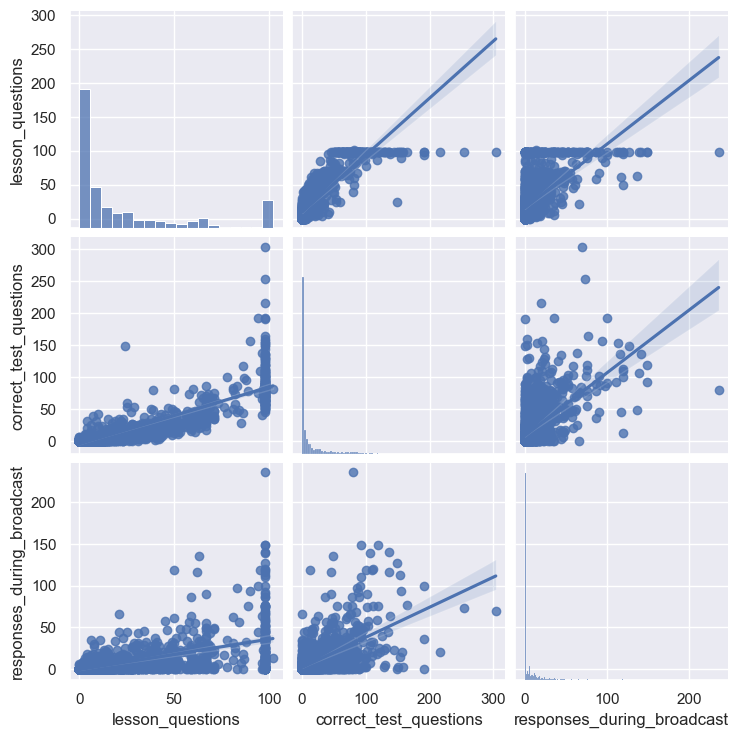

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

sns.pairplot(data=lira_learner_outcomes, kind="reg")
plt.show()

# Correlation Analysis

<Axes: title={'center': 'What behaviors are positively correlated with learning?'}>

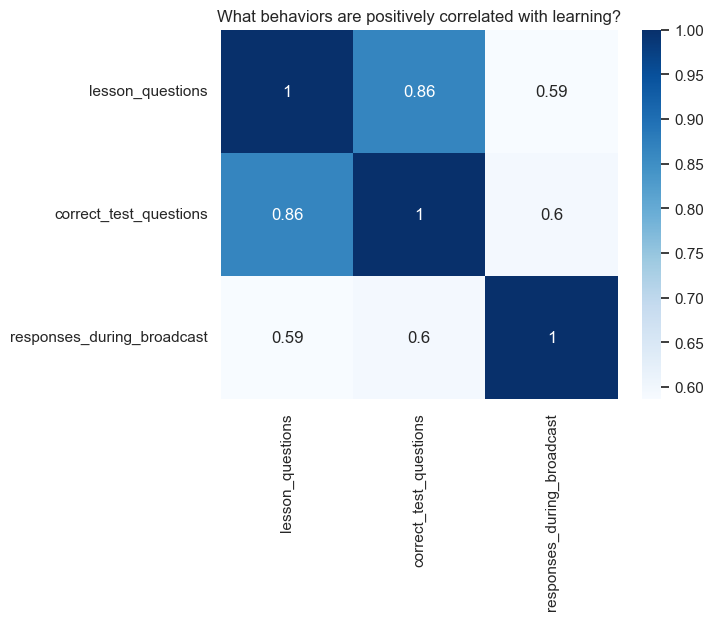

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

corr = lira_learner_outcomes.corr()

plt.title("What behaviors are positively correlated with learning?")

sns.heatmap(corr, cmap="Blues", annot=True)

There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions.

# Regression Analysis

The Regression analysis below shows that the coefficient for responses_during broadcast

In [298]:
import statsmodels.api as sm

y = lira_learner_outcomes["correct_test_questions"]
X = lira_learner_outcomes["responses_during_broadcast"]
mod = sm.OLS(y, X) 
res = mod.fit()
print(res.summary())


                                   OLS Regression Results                                  
Dep. Variable:     correct_test_questions   R-squared (uncentered):                   0.440
Model:                                OLS   Adj. R-squared (uncentered):              0.439
Method:                     Least Squares   F-statistic:                              1217.
Date:                    Sat, 30 Sep 2023   Prob (F-statistic):                   2.63e-197
Time:                            16:05:50   Log-Likelihood:                         -7304.6
No. Observations:                    1552   AIC:                                  1.461e+04
Df Residuals:                        1551   BIC:                                  1.462e+04
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.0

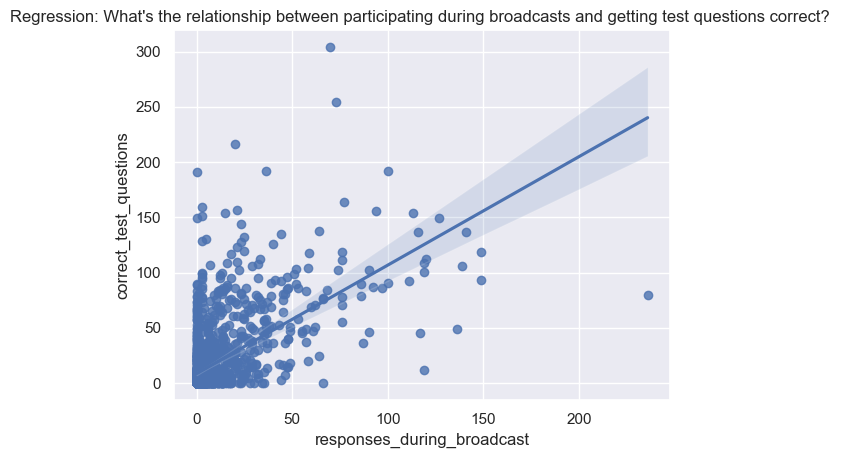

In [301]:
#Create Regression Plot of responses during broadcast vs correct test questions
sns.regplot(data=lira_learner_outcomes, x=X, y=y)
plt.title("Regression: What's the relationship between participating during broadcasts and getting test questions correct? ")
plt.show()

# Summary

Most messages for learners registered with the Lira course were sent near the broadcast times. There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions. However, there is a strong positive correlation between unique lesson questions attempted and test performance. This may suggest:
- Answering lesson questions without listening to the radio may be sufficient to perform well in tests
- Some learners may listen to broadcasts first to understand concepts and answer questions later

Limitations
- At time of analysis, the keys for the final exam in course 3 are unclear so it was not included. 

# Code Tests

In [299]:
test_data = pd.DataFrame(
    {"created": ["2022-11-26T11:15:52.000", "2022-11-15T14:15:59.000", "2022-11-26T11:15:52.000"],
     "key": ["airscience-2022a/course/step-2-investigate/step-2-lesson-3/go-to-questions#q3-why-did-the-stick-pencil-inserted-in-the-bottle-of-rice-stones-lift-up-the-bottle",
             "yiya-airscience-tests-2021/take-step-1-test#q1",
             "yiya-airscience-tests-2021/take-step-1-test#q1"]}
    )

test_data["created"] = pd.to_datetime(test_data["created"]) 
#test_data
print(test_data["created"].dt.day_name())
print(cal_user_resposes_during_broadcast(test_data))


0    Saturday
1     Tuesday
2    Saturday
Name: created, dtype: object
2
